## PyTorch Workflow Fundamentals

doc: https://www.learnpytorch.io/01_pytorch_workflow/


In [1]:
things_to_cover = {
1: "data (prepare and load)",
2: "\nbuild model",
3: "\nfitting the model (training)",
4: "\nmaking predictions and evaluating a model (inference)",
5: "\nsaving and loading a model",
6: "\nputting it all togther"}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check Pytorch version
torch.__version__

'2.6.0+cu124'

# 1. Data (preparing and loading)

* Excel spreadsheet
* Images of any kind
* Videos
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

Let's create some *known* data using the linear regression formula

A linear regression formula to make a straight line wiht *known* **parameters**

In [3]:
# create known parameters

weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

In [5]:
# create a training and test set with our data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How to better visualize the data

In [50]:
import matplotlib.pyplot as plt

def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """Plots training data, test data and compares predictions"""
  plt.figure(figsize=(10, 7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # plot test data in green
  plt.scatter(test_data, test_labels, c='green', s=4, label='Testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # show the legend
  plt.legend(prop={"size": 14});



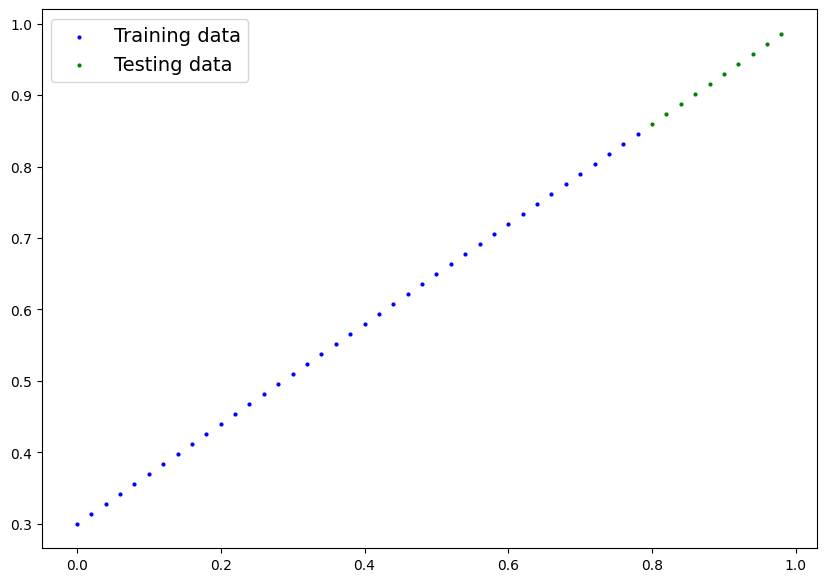

In [7]:
plot_prediction();

# 2. Build model

doc for OOP: https://realpython.com/python3-object-oriented-programming/

what our model does:
* start with random values: weights and bias
* look at training data and adjust the random values to better respresent(or get closer to) the ideal values(the weights & bias values we used to create the data)

how does it do so?
Through two main algorithms:
1. Gradient decent
2. Backpropagation

In [8]:
# create a linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module):  # almost everything in PyTorch is inherited from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


# Pytorch model building essentials

* torch.nn - contains all of the building for computational graphs (nn can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - is the base class for all neural network modules, if you should subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.module subclasses required you to overwrite forward(), this method defines what happens in the forward computation


In [9]:
torch.manual_seed(42)
torch.randn(1)


tensor([0.3367])

## checking the contents of our pytorch models


we have created a model, let's see what's inside

So we can check out our model parameters what's inside our models, using .parameters()

In [10]:
# create a random seed

torch.manual_seed(42)

# create an instance of the model we created (this is the subclass of nn.Module)

model_0 = LinearRegressionModel()
#check out the parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

## Making predictions using torch.inference_mode()
to check our model's predictive power, let's see how well it predicts y_test based on x_test
when we pass through our model, it's going to run it through the forward() method

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [15]:
# make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [16]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

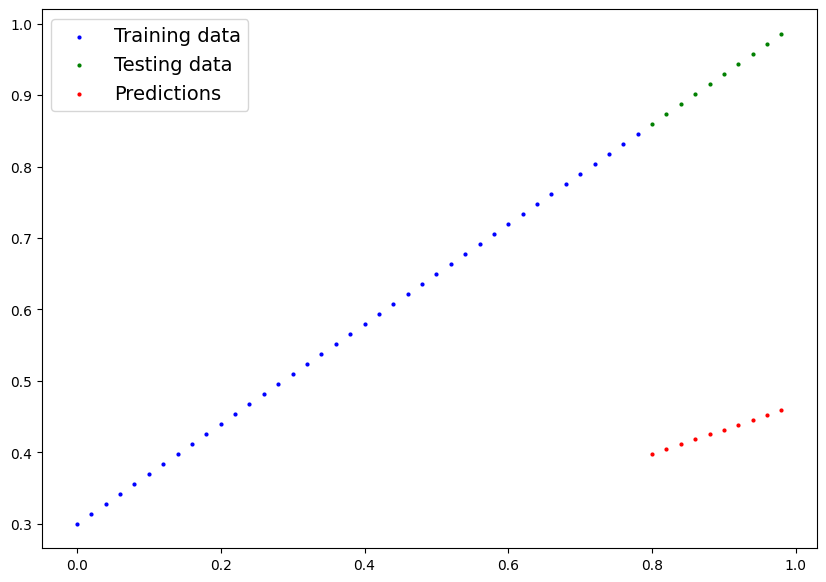

In [17]:
plot_prediction(predictions=y_preds)

## train model

* The whole idea of training is for a model to move from unknown random parameters to some **some** known parameters

or in other words from a poor representation of the data to a better representation of the data

* One way to measure how poor or how wrong your model's predictions are, is to use a loss function

Note: loss function may also be called cost function or criterion in different areas. For our case, it's refered to as loss function

Things we need:

* **Loss funciton** is a function to measure how wrong your model's predictions are to the ideal output, lower the better

* **Optimizer** takes into account the loss of a model and adjust the model's parameters (weights and bias) to improve the loss function.
    * Inside the optimizer you'll often have to set two parameters:
      * params = the model parameters you'd like to optimize, for eg., params=model_0.parameters()
      * lr (learning rate) - the learning rate os a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, lr results in large changes)

And specifically for pytorch, we need:
* a training loop
* a testing loop



In [18]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
# check out the model's parameters ( a parameters is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

optimizers doc: https://pytorch.org/docs/stable/optim.html

In [20]:
 # Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer  = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set


In [21]:
loss_fn

L1Loss()

**Q**: Which loss function and optimizer should I use?

**A**: This will be problem specifi. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For eg., for a regressioon model, a loss function of nn.L1Loss() and an optimizer like torch.optim.SGD() will suffice.

But for clarification problem like classfiying whether a photo is of a dog or a cat, you'll likely use a loss function of nn.BCELoss() (binary cross entropy loss).



## building a training loop (and testing loop) in pytorch

A couple of things we need for a training loop:
0. Loop through the data

1. forward pass (this involves data moving through our model's forward() function) to make predictions on data - also called a forward propagation

2. Calculate the loss (compare the forward pass predictions to ground truth labels)

3. Optimize zero grad

4. Loss backwards - move backwards through the network to calculate the gradients of each of the parameters of our model with repsect to the loss (**back propogation**)

5. Optimizer step - use the optimizer to adjust the model parameters to try to improve the loss (**gradient decent**)



In [22]:

torch.manual_seed(42)
# an epoch is one loop through the data... (this is a hyperparameter becsause we set it ourselves)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []


### Training

# 0. loop through the data
for epoch in range(epochs):
  # set the mode to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to required gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propogation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop

  ## testing
  model_0.state_dict()

  ## testing
  model_0.eval() # turns off different settings in the model not needed for evalutation/testing
  with torch.inference_mode(): # this turns off gradinet tracking & a couple of more things behind the scenes

    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())
    print(f"Epoch: {epoch}| Loss: {loss} | Test loss: {test_loss}")
    # print out model state_dict()
    print(model_0.state_dict())

Epoch: 0| Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10| Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20| Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30| Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40| Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50| Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60| Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [23]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [24]:
import numpy as np

np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [0.48106518387794495,
  0.3463551998138428,
  0.21729660034179688,
  0.14464017748832703,
  0.11360953003168106,
  0.09919948130846024,
  0.08886633068323135,
  0.0805937647819519,
  0.07232122868299484,
  0.06473556160926819,
  0.05646304413676262,
  0.04819049686193466,
  0.04060482233762741,
  0.03233227878808975,
  0.024059748277068138,
  0.016474086791276932,
  0.008201557211577892,
  0.005023092031478882,
  0.005023092031478882,
  0.005023092031478882])

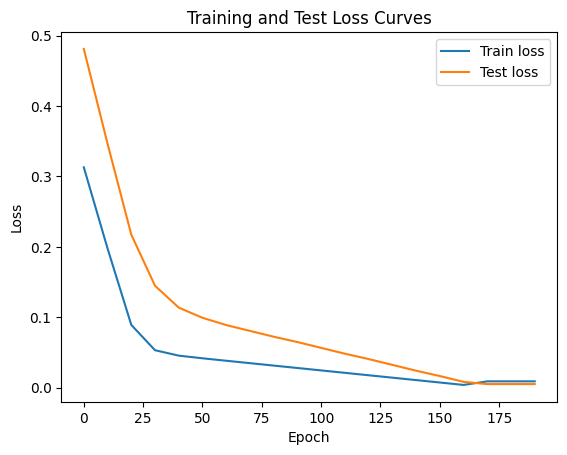

In [25]:
import matplotlib.pyplot as plt

plt.plot(epoch_count, loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [26]:
print(len(epoch_count), len(loss_values), len(test_loss_values))

20 20 20


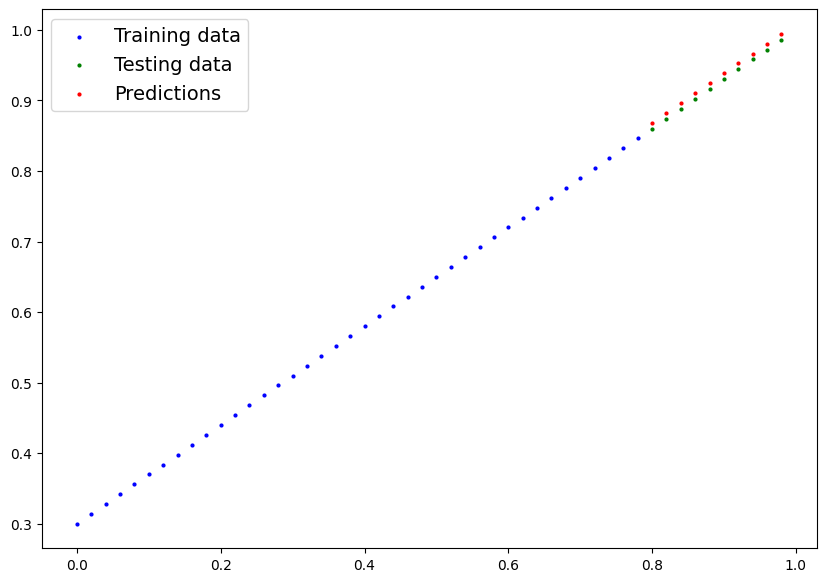

In [27]:
plot_prediction(predictions=y_preds_new);

In [28]:
print(f"Epoch: {epoch}| Loss: {loss} | Test loss: {test_loss}")

Epoch: 199| Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112


In [29]:
import torch

## Saving a Model in PyTorch

There are three main methods you should know about saving and loading models in pytorch

1. 'torch.save()' - allows you to save a Pytorch object in Python's pickle format
2. 'torch.load()' - allows you to load a saved Pytorch object
3. 'torch.nn.Module.load_state_dict()' - this allows to load a model's saved state dictionary

doc: https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [30]:
# saving our pytorch model

from pathlib import Path

# 1. create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model_0.pth


In [31]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Apr 25 19:41 01_pytorch_workflow_model_0.pth


## Loading a Pytorch model

Since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and load the saved state_dict() into that

In [32]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [33]:
# to load in a saved state_dict we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [34]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [35]:
# make some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [36]:
# Compare loaded model preds with orginal model preds

y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [37]:
# make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

## Putting everything together




### importing the requird libraries

In [38]:
# importing pytorch and matplotlib

import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.6.0+cu124


Create device-agnostic code

This means if we've got access to a GPU, our code will use it (for potentially faster computing)
if no GPU is available, the code will default to using CPU


In [39]:
# set up device-agnostic code


device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [40]:
!nvidia-smi

Fri Apr 25 19:41:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             48W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

## Data

In [44]:
# create data using linear regression formula (y = wx + b)

weight = 0.7
bias = 0.3

# create a range values
start = 0
end = 1
step = 0.02

# create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=-1) # withou the unsqueeze, errors will pop up
y = weight * X + bias

print(X[:10], y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [55]:
# Split the data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Building a Linear model

In [74]:
## building the Linear model

class LinearRegressionModelV2(nn.Module): # almost everything in Pytorch is inherited from nn.Module
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters / also called the linear transform, probing layer, fully layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)
# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 <bound method Module.state_dict of LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 )>)

In [75]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [77]:
# check the model's current device

next(model_1.parameters()).device

device(type='cpu')

In [78]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [80]:
# setup loss function

loss_fn = nn.L1Loss() # same as MAE

# setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001)


In [84]:
X_train = X_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)

In [88]:
if y_train.dim() == 1:
  y_train = y_train.unsqueeze(1)
if y_test.dim() == 1:
  y_test = y_test.unsqueeze(1)

In [89]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  #1. forward pass
  y_pred = model_1(X_train)
  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  #3. Optimizer zero grad
  optimizer.zero_grad()
  #4. Perform backpropagation
  loss.backward()
  #5. Optimizer step
  optimizer.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss} ")

Epoch: 0 | Loss: 0.3369687795639038 | Test loss: 0.329300194978714 
Epoch: 10 | Loss: 0.3254478871822357 | Test loss: 0.3158293664455414 
Epoch: 20 | Loss: 0.3139270842075348 | Test loss: 0.30235859751701355 
Epoch: 30 | Loss: 0.3024062216281891 | Test loss: 0.28888779878616333 
Epoch: 40 | Loss: 0.29088538885116577 | Test loss: 0.27541694045066833 
Epoch: 50 | Loss: 0.27936455607414246 | Test loss: 0.2619461715221405 
Epoch: 60 | Loss: 0.26784369349479675 | Test loss: 0.2484753131866455 
Epoch: 70 | Loss: 0.25632286071777344 | Test loss: 0.2350044995546341 
Epoch: 80 | Loss: 0.24480199813842773 | Test loss: 0.22153368592262268 
Epoch: 90 | Loss: 0.23328113555908203 | Test loss: 0.20806288719177246 
Epoch: 100 | Loss: 0.2217603176832199 | Test loss: 0.19459205865859985 
Epoch: 110 | Loss: 0.2102394551038742 | Test loss: 0.18112127482891083 
Epoch: 120 | Loss: 0.1987186223268509 | Test loss: 0.16765044629573822 
Epoch: 130 | Loss: 0.18719778954982758 | Test loss: 0.1541796773672104 
Epo

In [90]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6094]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4419], device='cuda:0'))])

In [87]:
weight, bias

(0.7, 0.3)

### making and evaluating predictions


In [91]:
# turn model into evaluation mode

model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_pred = model_1(X_test)
y_pred

tensor([[0.9294],
        [0.9416],
        [0.9538],
        [0.9660],
        [0.9781],
        [0.9903],
        [1.0025],
        [1.0147],
        [1.0269],
        [1.0391]], device='cuda:0')

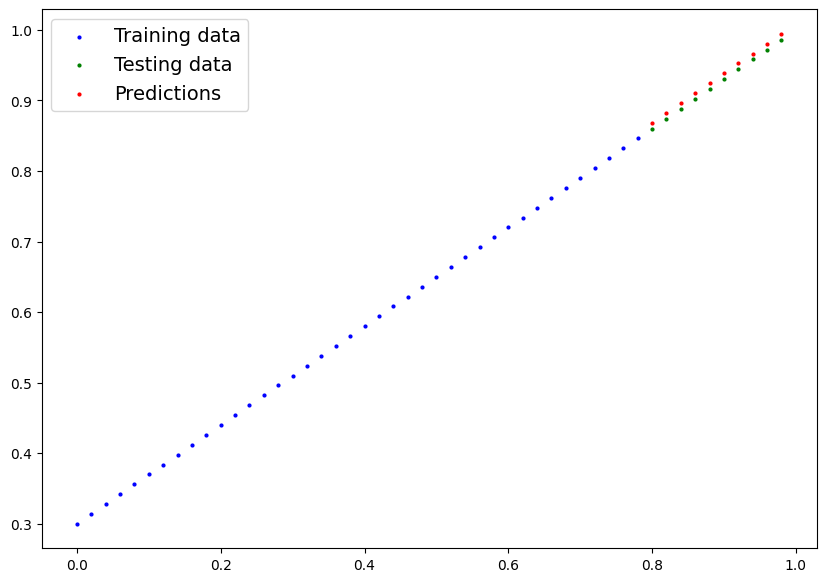

In [97]:
# check out the model's predictions visually

plot_prediction(predictions=y_preds.cpu())

## Saving and loading the model

In [102]:
from pathlib import Path

# 1. create the model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model sava path
MODEL_NAME =  "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving the model to: models/01_pytorch_workflow_model_1.pth


In [103]:
# load a pytorch model

# create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)



LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [115]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [105]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6094]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4419], device='cuda:0'))])

In [117]:
loaded_model_0.to(device)

LinearRegressionModel()

AttributeError: 'function' object has no attribute 'is_cuda'

In [116]:
# evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!